## Radar Raingage Intercomparisons

In [1]:
%matplotlib inline
import matplotlib as mpl
from raingage import *
from event import Event

In [2]:
path = "C:/Users/Julia/Google Drive/PHILADELPHIA/"

In [3]:
rg = RainGage(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")

In [4]:
rad = RainGage(path=path, name="Phila_gage_{YEAR}_fill.dat", year=range(2003,2015))

### Let's Explore!

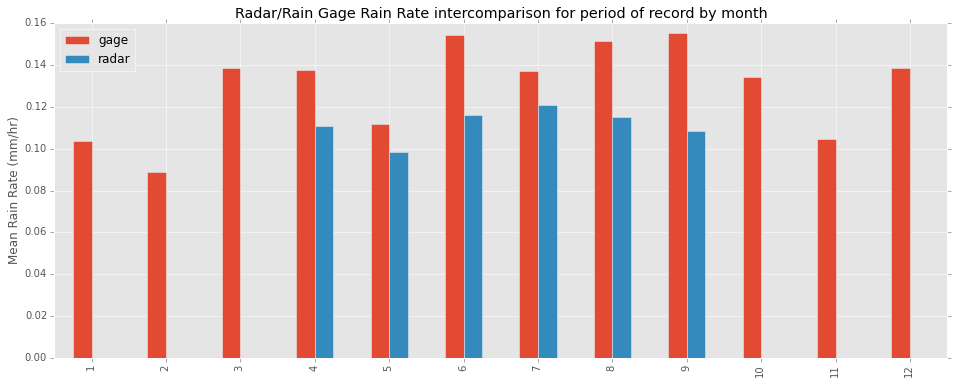

In [5]:
df = pd.DataFrame({'gage': rg.rate.mean(axis=1).groupby(rg.df.index.month).mean()})
df = df.join(pd.DataFrame({'radar': rad.rate.mean(axis=1).groupby(rad.df.index.month).mean()}))
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Mean Rain Rate (mm/hr)')
plt.title('Radar/Rain Gage Rain Rate intercomparison for period of record by month')
plt.show()

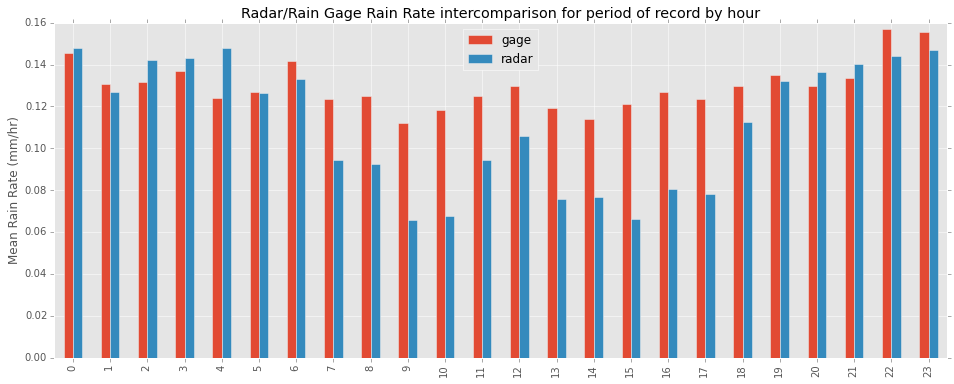

In [6]:
df = pd.DataFrame({'gage': rg.rate.mean(axis=1).groupby(rg.df.index.hour).mean()})
df = df.join(pd.DataFrame({'radar': rad.rate.mean(axis=1).groupby(rad.df.index.hour).mean()}))
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Mean Rain Rate (mm/hr)')
plt.title('Radar/Rain Gage Rain Rate intercomparison for period of record by hour')
plt.show()

Choose you threshold carefully. You will notice that it makes a big difference in the results

In [7]:
rg.thresh = rad.thresh = .1
rg.get_wet()
rad.get_wet()

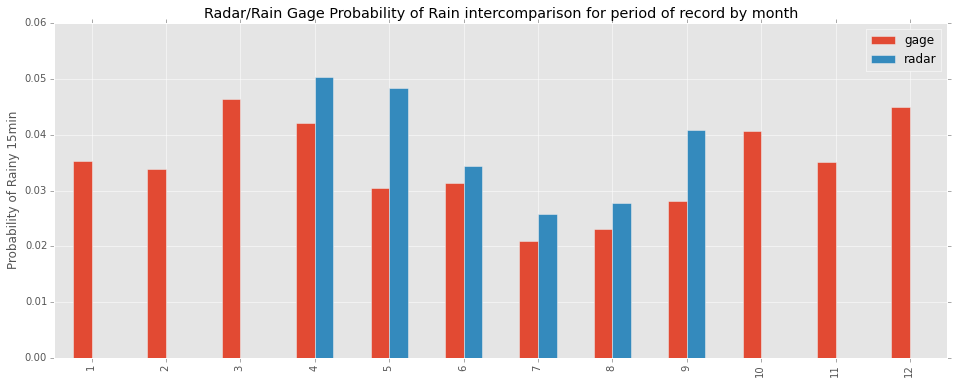

In [8]:
df = pd.DataFrame({'gage': rg.wet.mean(axis=1).groupby(rg.wet.index.month).mean()})
df = df.join(pd.DataFrame({'radar': rad.wet.mean(axis=1).groupby(rad.wet.index.month).mean()}))
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Probability of Rainy 15min')
plt.title('Radar/Rain Gage Probability of Rain intercomparison for period of record by month')
plt.show()

### Plot the rainfall in space using shaded points

In [9]:
from event import Event

In [10]:
storm = Event(rg, rad, '2013-08-13')

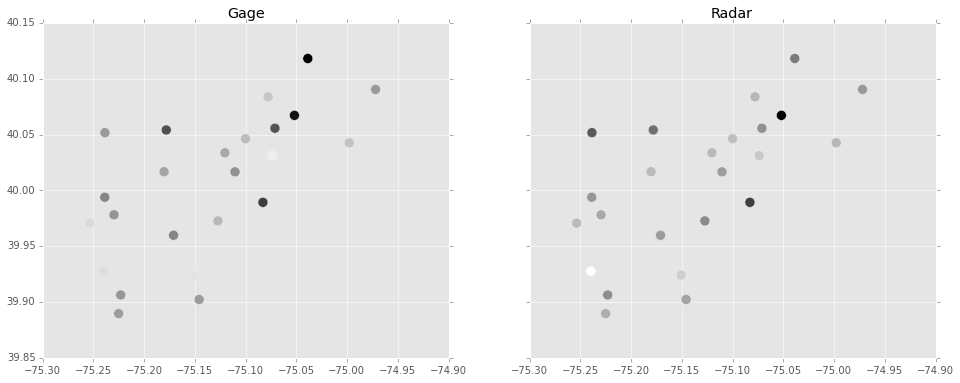

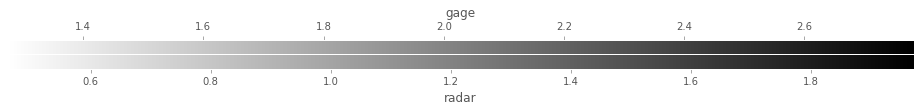

In [12]:
storm.map_event()